# L4. Crearea unei rețele neuronale cu straturi Dense pentru operații simple.
## (de exemplu pentru clasificare binară). Antrenarea rețelei și validarea rezultatelor.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [3]:
data = pd.read_csv("Diabetes Binary Classification.csv")
data.head(3)


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [6]:
# Check if Data has any null values 
data.isnull().sum()


Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skin fold thickness (mm)                                            0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age (years)                                                                 0
Class variable (0 or 1)                                                     0
dtype: int64

In [8]:
# Label encode Object Datatypes 

data_types_dict = dict(data.dtypes)
# Keep track Mappings Column name to LabelEncoders
Label_encoder_collection = {}
for col_name , data_type in data_types_dict.items():
    if data_type == 'object':
        Le = LabelEncoder()
        data[col_name] = Le.fit_transform(data[col_name])
        Label_encoder_collection[col_name] = Le 

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

In [10]:
data.head()


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
X = data.iloc[: , :-1].values.astype(np.float32)
Y = data.iloc[: , -1].values.astype(int)


In [14]:
Y


array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [22]:
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 101)


In [24]:
# Start your model with Sequential Object  
model = tf.keras.models.Sequential()
# Next add in your Input object and Specify the Dimension you want to pass in 
model.add(tf.keras.Input(shape=(8,)))
# Add in your Neurons of 1st layer
model.add(tf.keras.layers.Dense(64))
# 2nd layer 
model.add(tf.keras.layers.Dense(32))
# 3nd layer 
model.add(tf.keras.layers.Dense(16))
# Final Sigmoid layer to predict (0/1)
model.add(tf.keras.layers.Dense(1 , activation='sigmoid'))

# print summary to undertstand your neural network flow
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Create your optimizer and compile your model
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(Optimizer, loss='binary_crossentropy', metrics=["accuracy"])


In [28]:
history = model.fit(Xtrain , Ytrain , validation_data=(Xtest , Ytest), epochs=20)


Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6190 - loss: 12.3867 - val_accuracy: 0.4892 - val_loss: 2.2237
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5211 - loss: 1.9316 - val_accuracy: 0.6061 - val_loss: 0.8597
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5831 - loss: 0.8664 - val_accuracy: 0.6190 - val_loss: 0.6990
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5357 - loss: 0.9880 - val_accuracy: 0.6147 - val_loss: 0.8853
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6096 - loss: 1.1582 - val_accuracy: 0.6450 - val_loss: 1.0133
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5933 - loss: 1.0392 - val_accuracy: 0.6450 - val_loss: 0.6435
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5996 - loss: 0.8996 - val_accuracy: 0.5281 - val_loss: 0.8140
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5556 - loss: 1.1215 - val_accuracy: 0.6494 - val_loss

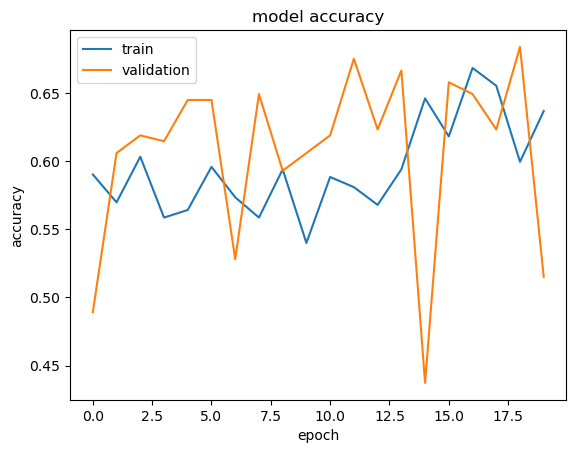

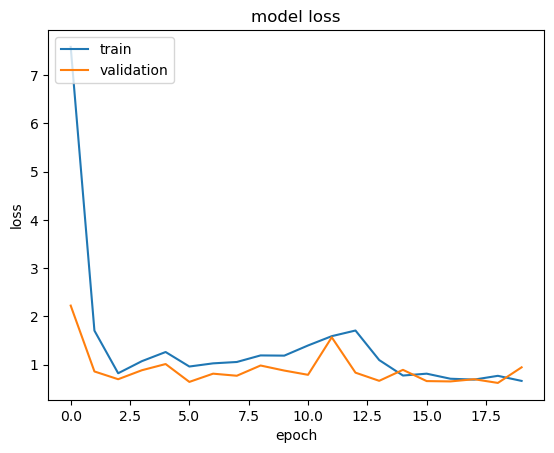

In [30]:
#  "Accuracy Plot"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss Plot"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# We see a lot of fluctuations in Accuracy Graph which concludes model learning is unstable


In [32]:
# collect predictions 
predictions = np.round(model.predict(Xtest))


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [34]:
# Check Accuracy
from sklearn.metrics import accuracy_score , confusion_matrix
accuracy_score(Ytest , predictions) # Accuracy Seems good


0.5151515151515151

In [36]:
confusion_matrix(Ytest , predictions)


array([[ 44, 106],
       [  6,  75]], dtype=int64)

In [38]:
from sklearn.metrics import classification_report 

print(classification_report(Ytest , predictions))



              precision    recall  f1-score   support

           0       0.88      0.29      0.44       150
           1       0.41      0.93      0.57        81

    accuracy                           0.52       231
   macro avg       0.65      0.61      0.51       231
weighted avg       0.72      0.52      0.49       231



In [40]:
# we will try to improve our model's performance 
# ----------- Add class weights when Data is Imbalanced -----------------------
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = 'balanced' ,  classes = np.unique(Ytrain), y=Ytrain)

model_class_weights = {}
for e , weight in enumerate(class_weights):
    model_class_weights[e] = weight
    

In [42]:
model_class_weights


{0: 0.7671428571428571, 1: 1.4358288770053476}

In [44]:
history = model.fit(Xtrain , Ytrain , validation_data=(Xtest , Ytest) , epochs=20, class_weight=model_class_weights)


Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5173 - loss: 0.8853 - val_accuracy: 0.5758 - val_loss: 0.8394
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6142 - loss: 0.7898 - val_accuracy: 0.5801 - val_loss: 0.7867
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6589 - loss: 0.6527 - val_accuracy: 0.6710 - val_loss: 0.6232
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5912 - loss: 0.8412 - val_accuracy: 0.6061 - val_loss: 1.1806
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6265 - loss: 1.0770 - val_accuracy: 0.4502 - val_loss: 1.0952
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5338 - loss: 1.3306 - val_accuracy: 0.3853 - val_loss: 1.8977
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5563 - loss: 1.5599 - val_accuracy: 0.5844 - val_loss: 1.3818
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5664 - loss: 0.9311 - val_accuracy: 0.5238 - val_loss:

In [46]:
# collect predictions 
predictions = np.round(model.predict(Xtest))


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42us/step


In [48]:
confusion_matrix(Ytest , predictions)



array([[135,  15],
       [ 56,  25]], dtype=int64)

In [53]:
# Better results for recognizing second-class items, but much worse for first-class items.

In [50]:
# Increase Units in Dense layers and Also Increase Number of Layers 
# Add BatchNormalization to Layers 
# Add Dropout after Layers 

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(8,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128 , activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64 , activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(32 , activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(16 , activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1 , activation='sigmoid'))

# print summary to undertstand your neural network flow
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,961 (50.63 KB)

 Trainable params: 12,497 (48.82 KB)

 Non-trainable params: 464 (1.81 KB)

In [52]:
# Create your optimizer and compile your model
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(Optimizer, loss='binary_crossentropy', metrics=["accuracy"])


In [54]:
history = model.fit(Xtrain , Ytrain , validation_data=(Xtest , Ytest) , epochs=20)


Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6332 - loss: 0.7091 - val_accuracy: 0.3593 - val_loss: 0.7490
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6818 - loss: 0.5941 - val_accuracy: 0.3550 - val_loss: 0.7793
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6981 - loss: 0.5705 - val_accuracy: 0.3680 - val_loss: 0.8040
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6884 - loss: 0.5829 - val_accuracy: 0.3723 - val_loss: 0.7812
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7539 - loss: 0.5296 - val_accuracy: 0.4113 - val_loss: 0.7554
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7536 - loss: 0.5287 - val_accuracy: 0.4762 - val_loss: 0.7117
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7580 - loss: 0.5033 - val_accuracy: 0.5758 - val_loss: 0.6680
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7157 - loss: 0.5233 - val_accuracy: 0.6450 - val_loss

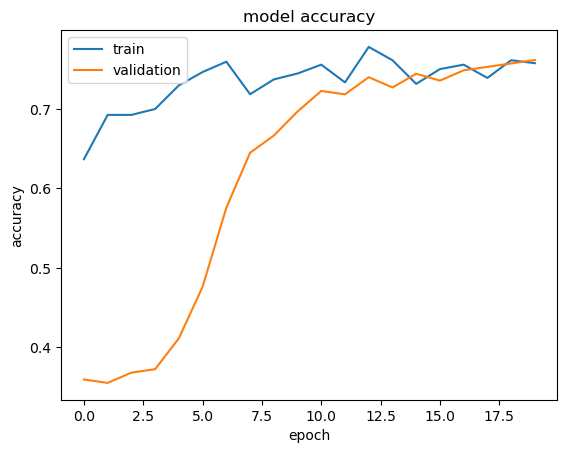

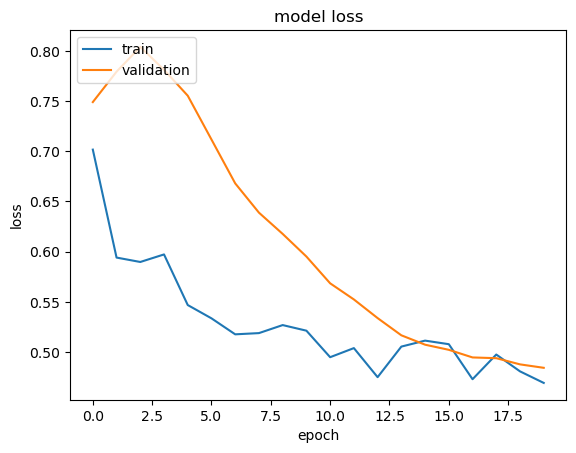

In [56]:
#  "Accuracy Plot"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss Plot"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# We see graphs converging better compared to previous implementation


In [58]:
# collect predictions 
predictions = np.round(model.predict(Xtest))


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 


In [60]:
# Check Accuracy
accuracy_score(Ytest , predictions) # Accuracy is good


0.7619047619047619

In [62]:
# We don't see the problem of predicting everything as class 0
confusion_matrix(Ytest , predictions)


array([[120,  30],
       [ 25,  56]], dtype=int64)

In [64]:
print(classification_report(Ytest, predictions))


              precision    recall  f1-score   support

           0       0.83      0.80      0.81       150
           1       0.65      0.69      0.67        81

    accuracy                           0.76       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.77      0.76      0.76       231

